# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader
from sklearn.metrics import r2_score

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2015-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,10328.500000,10120.250000,10326.750000,10167.450195,936500.0,10167.450195
2020-06-09,10291.150391,10021.450195,10181.150391,10046.650391,754200.0,10046.650391
2020-06-10,10148.750000,10036.849609,10072.599609,10116.150391,632400.0,10116.150391
2020-06-11,10112.049805,9885.049805,10094.099609,9902.000000,715500.0,9902.000000
2020-06-12,9996.049805,9544.349609,9544.950195,9972.900391,796300.0,9972.900391


In [4]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998099,0.998982,0.999108,0.187268,0.999108
Low,0.998099,1.000000,0.998976,0.998850,0.154963,0.998850
Open,0.998982,0.998976,1.000000,0.998107,0.172718,0.998107
Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000
Volume,0.187268,0.154963,0.172718,0.170811,1.000000,0.170811
Adj Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000


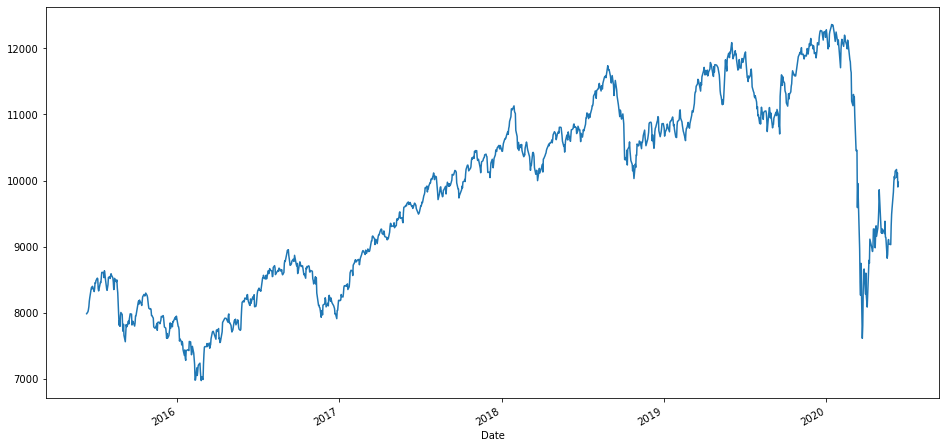

In [5]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [6]:
n=30
X = pd.DataFrame(index=data[['Adj Close']][0:n].index.copy())
for i in range(data.shape[0]-n):
    X[f'{i}'] = np.array(data['Adj Close'][i:n+i].values)
X = X.transpose()
X.index=data.tail(X.shape[0]).index
X = pd.concat([X,data[['Adj Close']].tail(X.shape[0])],axis = 1, sort = False)
X.drop(['Adj Close'],axis=1,inplace=True)

In [7]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,2015-06-12 00:00:00,2015-06-15 00:00:00,2015-06-16 00:00:00,2015-06-17 00:00:00,2015-06-18 00:00:00,2015-06-19 00:00:00,2015-06-22 00:00:00,2015-06-23 00:00:00,2015-06-24 00:00:00,2015-06-25 00:00:00,2015-06-26 00:00:00,2015-06-29 00:00:00,2015-06-30 00:00:00,2015-07-01 00:00:00,2015-07-02 00:00:00,2015-07-03 00:00:00,2015-07-06 00:00:00,2015-07-07 00:00:00,2015-07-08 00:00:00,2015-07-09 00:00:00,2015-07-10 00:00:00,2015-07-13 00:00:00,2015-07-14 00:00:00,2015-07-15 00:00:00,2015-07-16 00:00:00,2015-07-17 00:00:00,2015-07-20 00:00:00,2015-07-21 00:00:00,2015-07-22 00:00:00,2015-07-23 00:00:00
2015-06-12 00:00:00,1.000000,0.997309,0.994825,0.991993,0.989037,0.986106,0.982513,0.979697,0.976178,0.972724,0.969169,0.964848,0.960908,0.956508,0.952362,0.948430,0.944235,0.940346,0.936374,0.932662,0.928920,0.924923,0.921130,0.917257,0.913499,0.910053,0.906563,0.903229,0.899963,0.896626
2015-06-15 00:00:00,0.997309,1.000000,0.997241,0.994733,0.991915,0.988942,0.986026,0.982442,0.979617,0.976133,0.972624,0.969060,0.964616,0.960702,0.956378,0.952238,0.948290,0.944096,0.940278,0.936302,0.932591,0.928866,0.924884,0.921081,0.917223,0.913474,0.910023,0.906537,0.903175,0.899943
2015-06-16 00:00:00,0.994825,0.997241,1.000000,0.997236,0.994728,0.991910,0.988939,0.986034,0.982449,0.979618,0.976134,0.972618,0.969005,0.964573,0.960693,0.956367,0.952226,0.948282,0.944093,0.940233,0.936239,0.932489,0.928743,0.924732,0.920951,0.917076,0.913316,0.909898,0.906369,0.903090
2015-06-17 00:00:00,0.991993,0.994733,0.997236,1.000000,0.997233,0.994726,0.991907,0.988947,0.986043,0.982446,0.979623,0.976133,0.972579,0.968976,0.964571,0.960688,0.956362,0.952225,0.948276,0.944043,0.940162,0.936120,0.932342,0.928565,0.924576,0.920773,0.916886,0.913163,0.909701,0.906261
2015-06-18 00:00:00,0.989037,0.991915,0.994728,0.997233,1.000000,0.997230,0.994724,0.991913,0.988952,0.986042,0.982445,0.979617,0.976082,0.972539,0.968967,0.964559,0.960675,0.956352,0.952218,0.948232,0.943980,0.940058,0.935989,0.932183,0.928426,0.924416,0.920602,0.916749,0.912985,0.909604
2015-06-19 00:00:00,0.986106,0.988942,0.991910,0.994726,0.997230,1.000000,0.997228,0.994726,0.991915,0.988943,0.986040,0.982438,0.979577,0.976050,0.972530,0.968956,0.964547,0.960664,0.956338,0.952167,0.948162,0.943860,0.939903,0.935804,0.932017,0.928233,0.924211,0.920436,0.916542,0.912863
2015-06-22 00:00:00,0.982513,0.986026,0.988939,0.991907,0.994724,0.997228,1.000000,0.997229,0.994726,0.991908,0.988938,0.986031,0.982390,0.979538,0.976036,0.972515,0.968938,0.964529,0.960650,0.956293,0.952106,0.948056,0.943720,0.939735,0.935653,0.931839,0.928045,0.924059,0.920246,0.916431
2015-06-23 00:00:00,0.979697,0.982442,0.986034,0.988947,0.991913,0.994726,0.997229,1.000000,0.997227,0.994718,0.991901,0.988928,0.985987,0.982352,0.979520,0.976018,0.972493,0.968915,0.964510,0.960608,0.956237,0.952001,0.947912,0.943548,0.939576,0.935463,0.931638,0.927882,0.923862,0.920123
2015-06-24 00:00:00,0.976178,0.979617,0.982449,0.986043,0.988952,0.991915,0.994726,0.997227,1.000000,0.997218,0.994714,0.991895,0.988894,0.985958,0.982339,0.979506,0.976001,0.972475,0.968896,0.964467,0.960550,0.956126,0.951848,0.947729,0.943378,0.939372,0.935247,0.931463,0.927673,0.923730
2015-06-25 00:00:00,0.972724,0.976133,0.979618,0.982446,0.986042,0.988943,0.991908,0.994718,0.997218,1.000000,0.997204,0.994698,0.991827,0.988835,0.985930,0.982312,0.979472,0.975965,0.972459,0.968870,0.964431,0.960480,0.956025,0.951722,0.947615,0.943238,0.939223,0.935128,0.931315,0.927586


In [8]:
y = data[['Adj Close']].tail(X.shape[0])
y=y.rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [9]:
d = 40
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Multiple Linear Regression model on the Training set

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,max_depth = 7,min_samples_split = 23,max_leaf_nodes=46,
                                  min_samples_leaf=14, random_state = 0)
regressor.fit(X_train, y_train)
from sklearn.metrics import r2_score
r2_score(y_test, np.array(regressor.predict(X_test)))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7465913851488408

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 8907.    8992.8 ]
 [ 8907.01  9266.75]
 [ 9227.95  9261.85]
 [ 9228.09  8981.45]
 [ 8920.32  9187.3 ]
 [ 9156.71  9313.9 ]
 [ 9284.82  9154.4 ]
 [ 9152.45  9282.3 ]
 [ 9272.09  9380.9 ]
 [ 9356.86  9553.35]
 [ 9413.36  9859.9 ]
 [ 9552.61  9293.5 ]
 [ 9493.5   9205.6 ]
 [ 9231.02  9270.9 ]
 [ 9256.48  9199.05]
 [ 9228.54  9251.5 ]
 [ 9248.37  9239.2 ]
 [ 9262.35  9196.55]
 [ 9239.16  9383.55]
 [ 9405.78  9142.75]
 [ 9216.78  9136.85]
 [ 9207.6   8823.25]
 [ 8872.23  8879.1 ]
 [ 8907.36  9066.55]
 [ 9145.83  9106.25]
 [ 9154.37  9039.25]
 [ 9140.25  9029.05]
 [ 9146.09  9314.95]
 [ 9322.89  9490.1 ]
 [ 9398.21  9580.3 ]
 [ 9441.65  9826.15]
 [ 9548.61  9979.1 ]
 [ 9872.73 10061.55]
 [10072.96 10029.1 ]
 [10077.32 10142.15]
 [10155.59 10167.45]
 [10167.67 10046.65]
 [10084.35 10116.15]
 [10095.5   9902.  ]
 [ 9885.49  9972.9 ]]


regressor.predict([[86.95,90.95,90,88.25]])

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


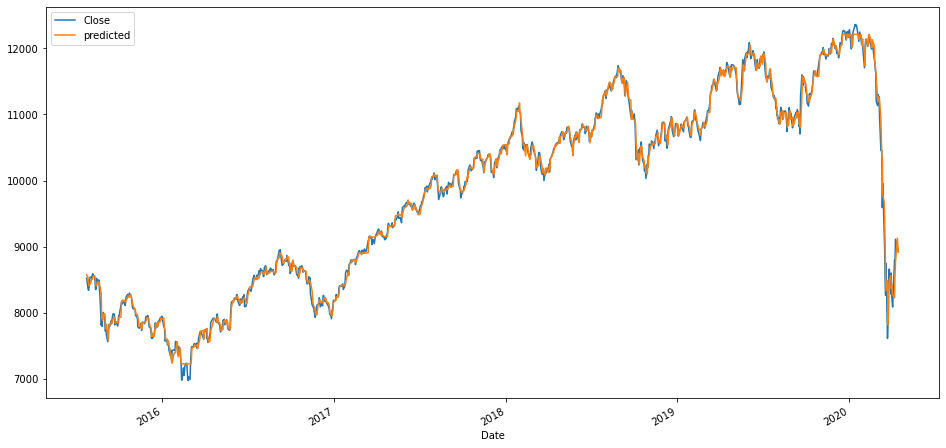

In [12]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


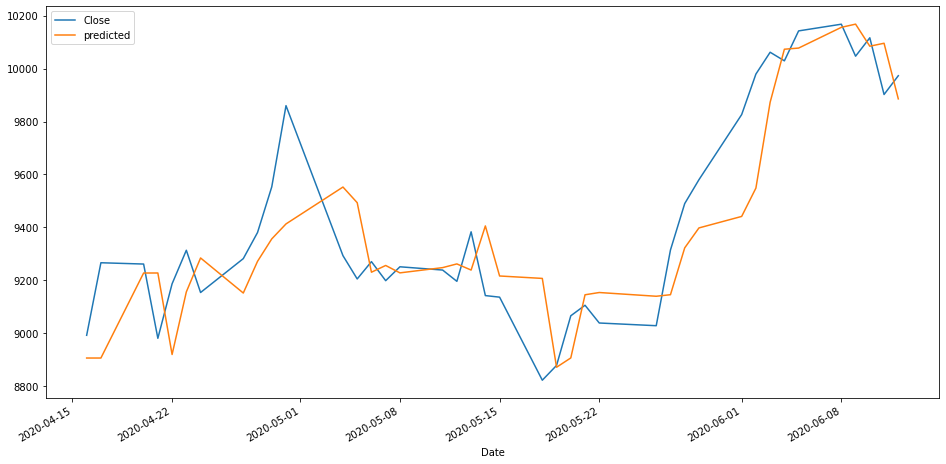

In [13]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [14]:
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

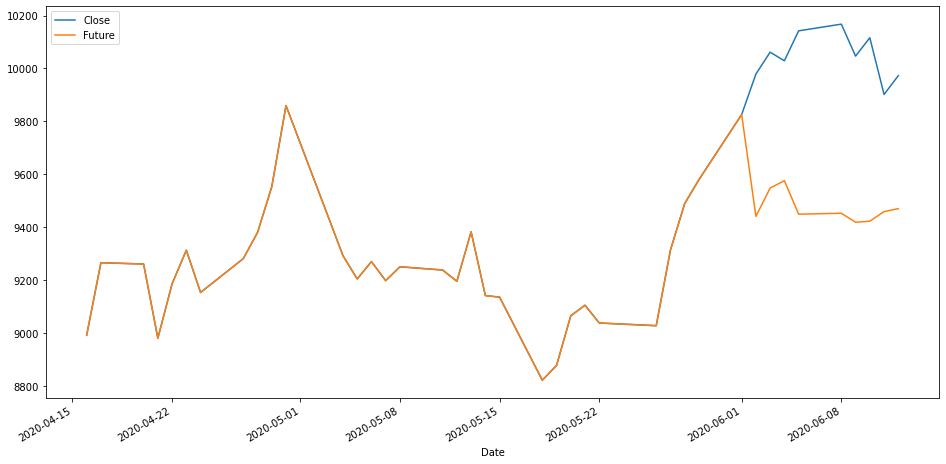

In [15]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-28.585045821662373